<a href="https://colab.research.google.com/github/NishaAnjalin/CSH4144-P/blob/main/Regression_29_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

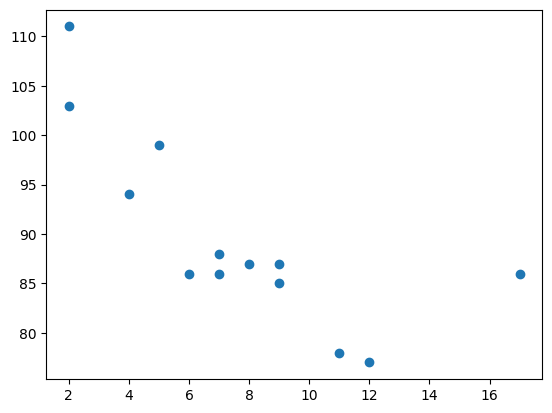

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x=[5,7,8,7,2,17,2,9,4,11,12,9,6]
y=[99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x,y)
plt.show()

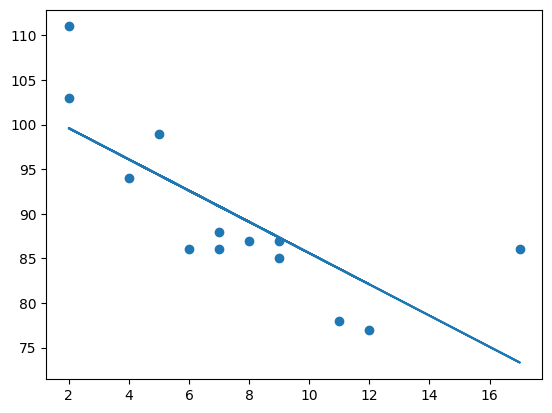

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
#Create the array that represent the values of the x and y axis:
x=[5,7,8,7,2,17,2,9,4,11,12,9,6]
y=[99,86,87,88,111,86,103,87,94,78,77,85,86]
#Execute a method that returns some important key values of Linear Regression
slop, intercept, r,p, std_err = stats.linregress(x,y)
"""
Create a function that uses the slope and intercept values to return a new value.
This new value represents where on the y-axis the corresponding x value will be placed:
"""
def myfunc(x):
    return slop * x + intercept

#Run each value of the x array through the function
#This will result in a new array with new values for the y-axis:

mymodel = list(map(myfunc,x))

#Draw the original scatter plot:
plt.scatter(x,y)

#Draw the line of linear regression:
plt.plot(x,mymodel)

#Display the diagram:
plt.show()

In [3]:
print(r)

-0.758591524376155


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans

In [6]:
dataset = pd.read_csv("/Advertising.csv")

In [7]:
dataset.drop(columns=['Radio','Newspaper'], inplace=True)
dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [9]:
dataset = pd.read_csv("/Advertising.csv")
x=dataset[['TV']]
y=dataset['Sales']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [12]:
#Intercept and Coefficient
print("Intercept: ", slr.intercept_)
print("Coefficient: ",slr.coef_)

Intercept:  6.923519536059553
Coefficient:  [0.04812204]


In [14]:
dataset = pd.read_csv("/Advertising.csv")
y_pred_slr=slr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [17.06764591 16.66823297 11.52879892 20.4073156  19.1368937  20.57093054
 14.78184893 15.62398466 10.32093567 17.2890073  14.83959538 10.25356482
 17.25532187 12.20731971 17.78947654 12.97246017 13.26119242 20.91259704
  8.1554438  17.06283371 11.75497252 10.18619396  8.13138278 12.09182681
 12.35649804 15.98971218  8.99757953 18.89628349 14.95027608 18.47762173
 18.46799732 18.2081383  14.12738917 15.11389102 18.87703468 15.82128503
 17.62586159 13.15051172 17.35637816  7.86671155  7.55391828 11.2737521
  7.82340171 16.74522823  7.27481044 14.01189627 10.68666319 17.89534503
 16.78853807 17.96752809 20.864475   12.84734286  7.85708714 15.71060434
 19.70473379 14.89252963 17.43818563  8.12657058 18.0926454   8.99276733]


In [15]:
slr_diff=pd.DataFrame({'Actual value ':y_test, 'Predicted value': y_pred_slr})
slr_diff.head()

,Actual value,Predicted value
58,23.8,17.067646
40,16.6,16.668233
34,9.5,11.528799
102,14.8,20.407316
184,17.6,19.136894


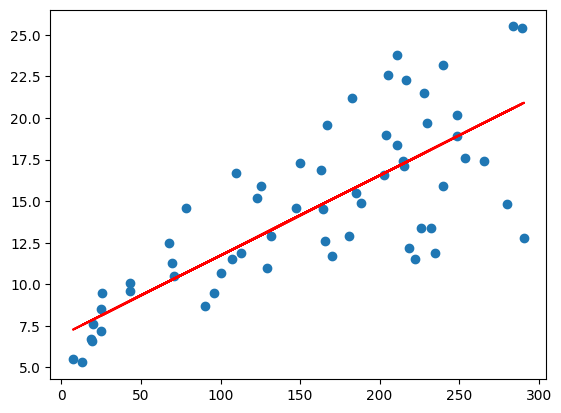

In [16]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_slr, 'Red')
plt.show()

In [17]:
#Model Evaluation
from sklearn import metrics
meanAbErr=metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr=metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('R square: {:.2f}'.format(slr.score(x,y)*100))
print('Mean Absolute error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R square: 61.18
Mean Absolute error:  2.548375850318048
Mean Square Error:  10.571057434656955
Root Mean Square Error:  3.251316261863333


In [19]:
dataset = pd.read_csv("/Advertising.csv")
x=dataset[['TV', 'Radio','Newspaper']]
y=dataset['Sales']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
mlr=LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [22]:
#Intercept and Coefficient
print("Intercept: ", slr.intercept_)
print("Coefficient: ",slr.coef_)
list(zip(x, mlr.coef_))

Intercept:  6.923519536059553
Coefficient:  [0.04812204]


[('TV', np.float64(0.04695204776848465)),
 ('Radio', np.float64(0.1765864352681737)),
 ('Newspaper', np.float64(0.0018511533188922402))]

In [24]:
dataset = pd.read_csv("/Advertising.csv")
y_pred_mlr=mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [21.66318307 16.44137936  7.69144625 17.9163172  18.67047113 23.79199311
 16.2825425  13.44138683  9.15294033 17.32475313 14.43922876  9.84019547
 17.26329945 16.62853147 15.09158705 15.50173894 12.43404074 17.32591521
 11.04327486 18.05652777  9.35309526 12.79465958  8.73413846 10.47225333
 11.38216042 15.02658554  9.7406823  19.44676903 18.19211174 17.20178728
 21.56359539 14.70484262 16.2635213  12.37098906 19.97059316 15.36768988
 14.00399515 10.0772945  20.91891557  7.43833283  3.67031166  7.27760354
  5.99523188 18.41497546  8.31868226 14.1090252  14.93697583 20.35882814
 20.56271636 19.55380813 24.10360923 14.84985778  6.71474914 19.77761567
 18.93996367 12.5109195  14.20052652  6.10844697 15.3695344   9.56769111]


In [25]:
mlr_diff=pd.DataFrame({'Actual value ':y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
58,23.8,21.663183
40,16.6,16.441379
34,9.5,7.691446
102,14.8,17.916317
184,17.6,18.670471


In [26]:
#Model Evaluation
from sklearn import metrics
meanAbErr=metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr=metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R square: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R square: 89.59
Mean Absolute error:  1.0548328405073322
Mean Square Error:  1.928924907466573
Root Mean Square Error:  1.388857410775697
